In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d quora/question-pairs-dataset


Dataset URL: https://www.kaggle.com/datasets/quora/question-pairs-dataset
License(s): other
  0% 0.00/20.8M [00:00<?, ?B/s]
100% 20.8M/20.8M [00:00<00:00, 1.30GB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/question-pairs-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
df = pd.read_csv('/content/questions.csv')

In [5]:
df.shape

(404351, 6)

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
new_df = df

In [8]:
# zero_out=new_df[new_df['is_duplicate']==0].sample(150000)
# one_out=new_df[new_df['is_duplicate']==1]

In [9]:
# zero_out

In [10]:
# #concate the output
# new_df = pd.concat([zero_out, one_out], axis=0)

In [11]:
new_df.is_duplicate.value_counts()

,count
is_duplicate,
0,255045
1,149306


In [12]:
import re
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags

    q = re.sub(r'<.*?>', '', q)
    q = re.sub(r'<.*?>', '', q)


    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    q = re.sub(r' \s', ' ', q)


    return q


In [13]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [14]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [15]:
new_df.dropna(inplace=True)

In [16]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0


In [17]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [18]:
new_df.duplicated().sum()

np.int64(0)

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

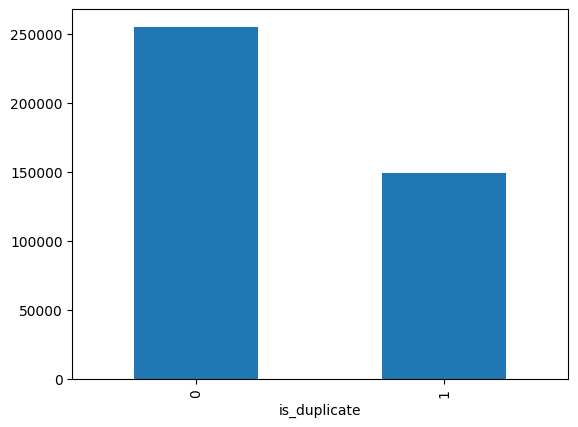

In [19]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [20]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


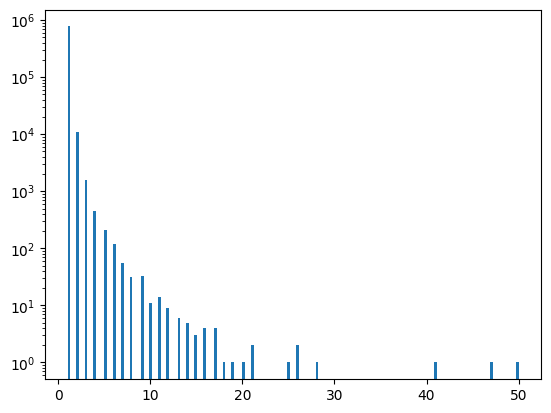

In [21]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [22]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [23]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0,48,55
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38


In [24]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0,48,55,11,13
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7


In [25]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [26]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,7
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0,48,55,11,13,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4


In [27]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [28]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,7,24
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0,48,55,11,13,0,21
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4,20


In [29]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,7,24,0.29
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24,0.17
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0,48,55,11,13,0,21,0.00
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4,20,0.20


In [30]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


In [31]:

import nltk
nltk.download('stopwords')
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16256 sha256=1dd371f88d2bbecad5b8931883a6fc097da1497886684f7d9be663f3f6273489
  Stored in directory: /root/.cache/pip/wheels/fb/cd/9c/3ab5d666e3bcacc58900b10959edd3816cc9557c7337986322
Successfully built distance


In [33]:
import distance

def fetch_length_features(row):
    q1 = str(row['question1'])
    q2 = str(row['question2'])

    length_features = [0.0] * 3

    # Tokenize the sentences
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # 1. Absolute difference in number of tokens
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # 2. Mean number of tokens
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # 3. Longest common substring ratio (safe check)
    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0

    return length_features


In [34]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [35]:
!pip install fuzzywuzzy

In [36]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [37]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [38]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [39]:
new_df=new_df[new_df['q1_len']<300]

minimum characters 0
maximum characters 299
average num of characters 58


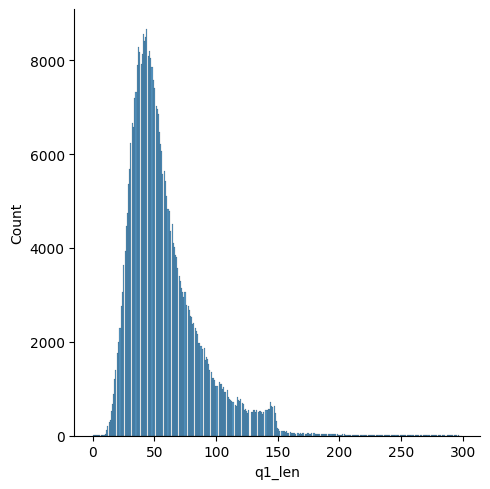

In [40]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

In [41]:
new_df=new_df[new_df['q2_len']<300]

minimum characters 0
maximum characters 299
average num of characters 58


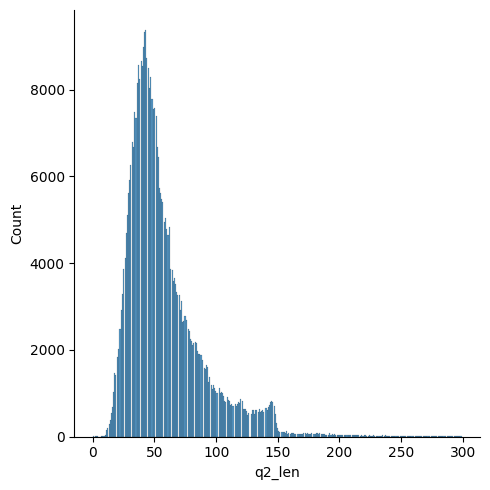

In [42]:

sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

In [43]:
new_df=new_df[new_df['q1_num_words']<55]

minimum words 1
maximum words 54
average num of words 11


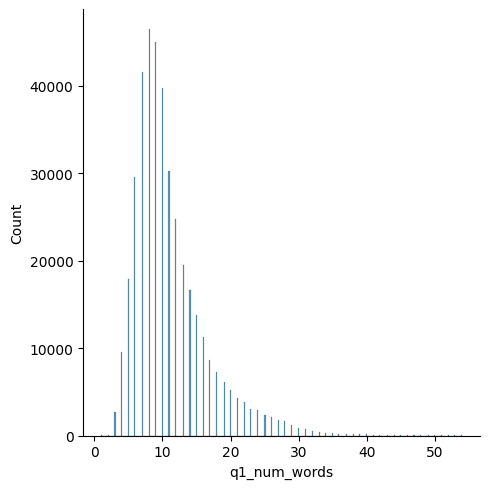

In [44]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

In [45]:
new_df=new_df[new_df['q2_num_words']<60]

minimum words 1
maximum words 59
average num of words 11


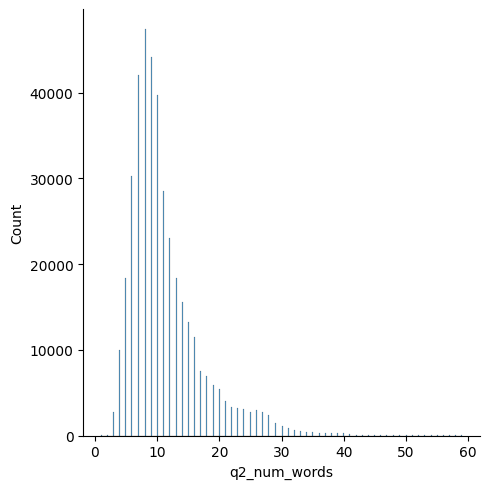

In [46]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

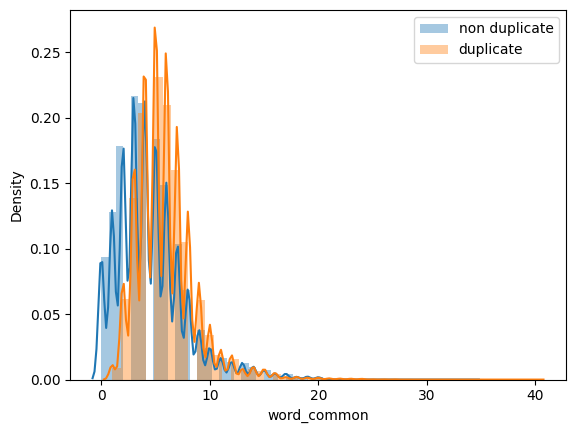

In [47]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

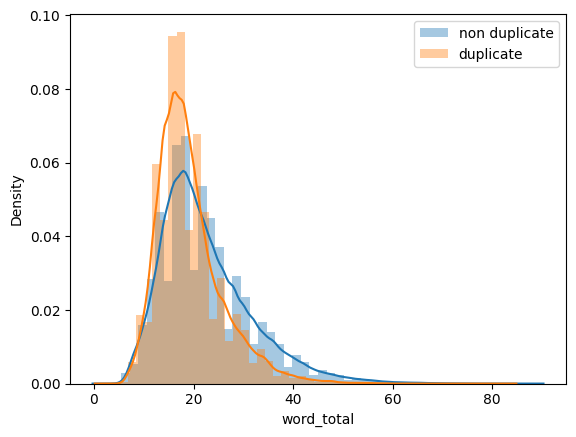

In [48]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

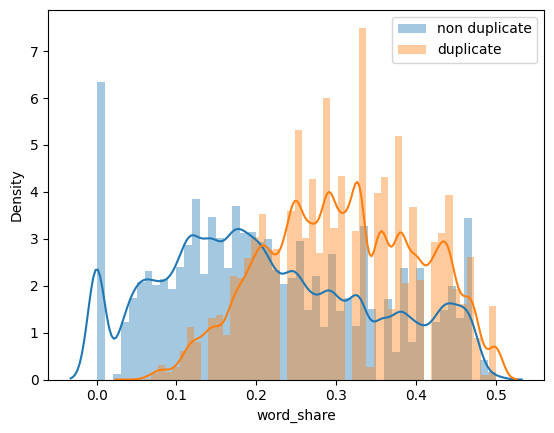

In [49]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [50]:
ques_df = new_df[['question1','question2']].astype('str')
ques_df.head()

,question1,question2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water


In [51]:
final_df = new_df.drop(columns=['is_duplicate','id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(403872, 22)


,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,65,56,14,12,11,23,0.48,0.999980,0.833319,0.999983,...,0.785709,0.0,1.0,2.0,13.0,0.982456,93,100,93,100
1,48,85,10,15,7,24,0.29,0.799984,0.399996,0.749981,...,0.466664,0.0,1.0,5.0,12.5,0.571429,65,73,63,86
2,72,58,14,10,4,24,0.17,0.399992,0.333328,0.399992,...,0.285712,0.0,1.0,4.0,12.0,0.169492,43,46,63,63
3,48,55,11,13,0,21,0.00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,1.0,11.5,0.040816,10,12,25,28
4,73,38,13,7,4,20,0.20,0.399992,0.199998,0.999950,...,0.307690,0.0,1.0,6.0,10.0,0.153846,36,55,47,67


In [52]:
labels=new_df['is_duplicate']

In [53]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.785709,0.0,1.0,2.0,13.0,0.982456,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,48,85,10,15,...,0.466664,0.0,1.0,5.0,12.5,0.571429,65,73,63,86
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,0.285712,0.0,1.0,4.0,12.0,0.169492,43,46,63,63
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided...,0,48,55,11,13,...,0.000000,0.0,0.0,1.0,11.5,0.040816,10,12,25,28
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,...,0.307690,0.0,1.0,6.0,10.0,0.153846,36,55,47,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,404346,789792,789793,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,84,78,14,13,...,0.785709,1.0,1.0,1.0,13.5,0.392405,91,87,88,97
404347,404347,789794,789795,do you believe there is life after death,is it true that there is life after death,1,40,41,8,9,...,0.555549,1.0,0.0,1.0,8.5,0.634146,72,75,69,79
404348,404348,789796,789797,what is one coin,what is this coin,0,16,17,4,4,...,0.749981,1.0,1.0,0.0,4.0,0.470588,79,75,79,86
404349,404349,789798,789799,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,92,124,17,25,...,0.040000,0.0,0.0,8.0,21.0,0.053763,31,34,35,37


In [54]:
final_df.head()

,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,65,56,14,12,11,23,0.48,0.999980,0.833319,0.999983,...,0.785709,0.0,1.0,2.0,13.0,0.982456,93,100,93,100
1,48,85,10,15,7,24,0.29,0.799984,0.399996,0.749981,...,0.466664,0.0,1.0,5.0,12.5,0.571429,65,73,63,86
2,72,58,14,10,4,24,0.17,0.399992,0.333328,0.399992,...,0.285712,0.0,1.0,4.0,12.0,0.169492,43,46,63,63
3,48,55,11,13,0,21,0.00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,1.0,11.5,0.040816,10,12,25,28
4,73,38,13,7,4,20,0.20,0.399992,0.199998,0.999950,...,0.307690,0.0,1.0,6.0,10.0,0.153846,36,55,47,67


In [55]:
labels.shape

(403872,)

# **Applying smoot on the data to fix the imbalanced**


# Applying deep Learining


In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Combine all questions to fit tokenizer
all_questions = list(ques_df['question1']) + list(ques_df['question2'])  # both are list of strings
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(all_questions)

# Convert each question to sequence
q1_seq = tokenizer.texts_to_sequences(list(ques_df['question1']))
q2_seq = tokenizer.texts_to_sequences(list(ques_df['question2'])  )

In [57]:
# Pad sequences to same length
MAX_LEN = 50
q1_pad = pad_sequences(q1_seq, maxlen=MAX_LEN)
q2_pad = pad_sequences(q2_seq, maxlen=MAX_LEN)

In [101]:
import numpy as np

# shape: (num_samples, 21)
heuristic_features = np.array(final_df)


In [97]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dropout ,BatchNormalization

# Enable multi-GPU strategy
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    VOCAB_SIZE = 50000
    EMBED_DIM = 300

    q1_input = Input(shape=(MAX_LEN,), name='q1_input')
    q2_input = Input(shape=(MAX_LEN,), name='q2_input')
    heur_input = Input(shape=(22,), name='heuristic_input')

    embedding = Embedding(VOCAB_SIZE, EMBED_DIM, input_length=MAX_LEN)

    q1_emb = embedding(q1_input)
    q2_emb = embedding(q2_input)

    lstm = LSTM(64)
    q1_lstm = lstm(q1_emb)
    q2_lstm = lstm(q2_emb)

    merged_questions = Concatenate()([q1_lstm, q2_lstm])
    combined = Concatenate()([merged_questions, heur_input])

    x = Dense(128, activation='relu')(combined)
    x= BatchNormalization()(x)
    x = Dropout(0.7)(x)
    x = Dense(128, activation='relu')(x)
    x= BatchNormalization()(x)
    x = Dropout(0.7)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[q1_input, q2_input, heur_input], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ q1_input            │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ q2_input            │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 50, 300)   │ 15,000,000 │ q1_input[0][0],   │
│ (Embedding)         │                   │            │ q2_input[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     93,440 │ embedding_1[0][0… │
│                     │                   │            │ embedding_1[1][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 128)       │          0 │ lstm_1[0][0],     │
│ (Concatenate)       │                   │            │ lstm_1[1][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ heuristic_input     │ (None, 22)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 150)       │          0 │ concatenate_2[0]… │
│ (Concatenate)       │                   │            │ heuristic_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     19,328 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     16,512 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │        129 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,130,433 (57.72 MB)

 Trainable params: 15,129,921 (57.72 MB)

 Non-trainable params: 512 (2.00 KB)

In [98]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Example values
# y = np.array([0]*df[df['is_duplicate']==0].shape[0] + [1]*df[df['is_duplicate']==1].shape[0])  # or use your actual label array

# # Automatically compute class weights
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

# # Convert to dictionary format for Keras
# class_weight_dict = dict(zip(np.unique(y), class_weights))

# print(class_weight_dict)


In [99]:
heuristic_features.shape

AttributeError: 'function' object has no attribute 'shape'

In [ ]:
# when i use all data without any sampling just perform trainin by class weight
model.fit(
    x=[q1_pad, q2_pad, heuristic_features],
    y=labels,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    class_weight={0: 0.792, 1: 1.354}
)


Epoch 1/10
5049/5049 ━━━━━━━━━━━━━━━━━━━━ 113s 22ms/step - accuracy: 0.7175 - loss: 0.5416 - val_accuracy: 0.8133 - val_loss: 0.3820
Epoch 2/10
4089/5049 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8184 - loss: 0.3773

In [82]:
# import numpy as np

# q1_sample = np.expand_dims(q1_pad[130], axis=0)  # shape: (1, 100)
# q2_sample = np.expand_dims(q2_pad[130], axis=0)  # shape: (1, 100)
# heur_sample = np.expand_dims(heuristic_features[130], axis=0)  # shape: (1, 22)

# # Predict
# pred = model.predict([q1_pad[130:150], q1_pad[130:150], heur_sample[130:150]])
# label = 1 if pred[0][0] >= 0.5 else 0

# print("percent confident:", pred)
# print("Predicted label:", label)



In [61]:
import re
import joblib
import numpy as np
from fuzzywuzzy import fuzz
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
try:
    from distance import lcsubstrings
except ImportError:
    from difflib import SequenceMatcher

    def lcsubstrings(s1, s2):
        matcher = SequenceMatcher(None, s1, s2)
        match = matcher.find_longest_match(0, len(s1), 0, len(s2))
        if match.size == 0:
            return []
        return [s1[match.a : match.a + match.size]]


# Global tokenizer to avoid repeated fitting
global_tokenizer = None


def preprocess(q):
    """
    Preprocesses a question string by normalizing text, removing special在那

    Args:
        q (str): Input question string.

    Returns:
        str: Preprocessed question string.
    """
    if q is None or not isinstance(q, (str, bytes)) or not q.strip():
        return ""
    q = str(q).lower().strip()

    # Replace special characters
    q = q.replace("%", " percent").replace("$", " dollar ").replace("₹", " rupee ").replace("€", " euro ").replace("@", " at ")
    q = q.replace("[math]", "")

    # Replace numbers
    q = q.replace(",000,000,000 ", "b ").replace(",000,000 ", "m ").replace(",000 ", "k ")
    q = re.sub(r"([0-9]+)000000000", r"\1b", q)
    q = re.sub(r"([0-9]+)000000", r"\1m", q)
    q = re.sub(r"([0-9]+)000", r"\1k", q)

    # Decontract words
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have",
    }
    q_decontracted = [contractions.get(word, word) for word in q.split()]
    q = " ".join(q_decontracted)
    q = q.replace("'ve", " have").replace("n't", " not").replace("'re", " are").replace("'ll", " will")
    # Remove HTML tags
    q = re.sub(r"<.*?>", "", q)
    # Remove punctuation and collapse whitespace
    q = re.sub(r"\W", " ", q)
    q = re.sub(r"\s+", " ", q).strip()
    return q


def test_common_words(q1, q2):
    """
    Counts common words between two questions.

    Args:
        q1 (str): First question.
        q2 (str): Second question.

    Returns:
        int: Number of common words.
    """
    w1 = set(map(lambda word: word.lower().strip(), q1.split()))
    w2 = set(map(lambda word: word.lower().strip(), q2.split()))
    return len(w1 & w2)


def test_total_words(q1, q2):
    """
    Calculates total unique words in both questions.

    Args:
        q1 (str): First question.
        q2 (str): Second question.

    Returns:
        int: Total number of unique words.
    """
    w1 = set(map(lambda word: word.lower().strip(), q1.split()))
    w2 = set(map(lambda word: word.lower().strip(), q2.split()))
    return len(w1) + len(w2)


def test_fetch_token_features(q1, q2):
    """
    Extracts token-based features for question pair similarity.

    Args:
        q1 (str): First question.
        q2 (str): Second question.

    Returns:
        list: List of 8 token-based features.
    """
    SAFE_DIV = 0.0001
    try:
        STOP_WORDS = joblib.load("/content/stopwords.pkl")
    except FileNotFoundError:
        try:
            from nltk.corpus import stopwords

            STOP_WORDS = set(stopwords.words("english"))
        except ImportError:
            STOP_WORDS = set(
                [
                    "a",
                    "an",
                    "and",
                    "are",
                    "as",
                    "at",
                    "be",
                    "by",
                    "for",
                    "from",
                    "has",
                    "he",
                    "in",
                    "is",
                    "it",
                    "its",
                    "of",
                    "on",
                    "that",
                    "the",
                    "to",
                    "was",
                    "were",
                    "will",
                    "with",
                ]
            )

    token_features = [0.0] * 8
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    q1_words = set(word for word in q1_tokens if word not in STOP_WORDS)
    q2_words = set(word for word in q2_tokens if word not in STOP_WORDS)
    q1_stops = set(word for word in q1_tokens if word in STOP_WORDS)
    q2_stops = set(word for word in q2_tokens if word in STOP_WORDS)

    common_word_count = len(q1_words.intersection(q2_words))
    common_stop_count = len(q1_stops.intersection(q2_stops))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = (
        common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
        if q1_words and q2_words
        else 0.0
    )
    token_features[1] = (
        common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
        if q1_words and q2_words
        else 0.0
    )
    token_features[2] = (
        common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
        if q1_stops and q2_stops
        else 0.0
    )
    token_features[3] = (
        common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
        if q1_stops and q2_stops
        else 0.0
    )
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[6] = int(
        len(q1_tokens) > 0 and len(q2_tokens) > 0 and q1_tokens[-1] == q2_tokens[-1]
    )
    token_features[7] = int(
        len(q1_tokens) > 0 and len(q2_tokens) > 0 and q1_tokens[0] == q2_tokens[0]
    )

    return token_features


def test_fetch_length_features(q1, q2):
    """
    Extracts length-based features for question pair similarity.

    Args:
        q1 (str): First question.
        q2 (str): Second question.

    Returns:
        list: List of 3 length-based features.
    """
    length_features = [0.0] * 3
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2
    strs = list(lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1) if strs else 0.0

    return length_features


def test_fetch_fuzzy_features(q1, q2):
    """
    Extracts fuzzy matching features for question pair similarity.

    Args:
        q1 (str): First question.
        q2 (str): Second question.

    Returns:
        list: List of 4 fuzzy matching features.
    """
    fuzzy_features = [0.0] * 4
    fuzzy_features[0] = fuzz.QRatio(q1, q2)
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)
    return fuzzy_features


def token_padding_data(q1, q2, max_len=50, vocab_size=50000):
    """
    Converts questions to padded tokenized sequences.

    Args:
        q1 (list): List of first questions.
        q2 (list): List of second questions.
        max_len (int): Maximum length for padding.
        vocab_size (int): Maximum vocabulary size.

    Returns:
        tuple: Padded sequences for q1 and q2.
    """
    global global_tokenizer
    if global_tokenizer is None:
        global_tokenizer = Tokenizer(num_words=vocab_size)
        global_tokenizer.fit_on_texts(q1 + q2)

    q1_seq = global_tokenizer.texts_to_sequences(q1)
    q2_seq = global_tokenizer.texts_to_sequences(q2)
    q1_pad = pad_sequences(q1_seq, maxlen=max_len)
    q2_pad = pad_sequences(q2_seq, maxlen=max_len)
    return q1_pad, q2_pad


def heuristic_features(features):
    """
    Converts feature list to NumPy array.

    Args:
        features (list): List of features.

    Returns:
        np.ndarray: Array of features.
    """
    return np.array(features)


def query_point_creator(q1, q2):
    """
    Creates feature vector for a question pair.

    Args:
        q1 (str): First question.
        q2 (str): Second question.

    Returns:
        np.ndarray: Combined feature vector including padded sequences and heuristics.
    """
    if not isinstance(q1, str) or not isinstance(q2, str):
        raise ValueError("Both q1 and q2 must be strings")

    # Preprocess questions
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # Initialize feature list
    input_query = []

    # Basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    input_query.append(len(q1.split()))
    input_query.append(len(q2.split()))
    input_query.append(test_common_words(q1, q2))
    input_query.append(test_total_words(q1, q2))
    input_query.append(
        round(test_common_words(q1, q2) / (test_total_words(q1, q2) + 0.0001), 2)
    )

    # Token features
    input_query.extend(test_fetch_token_features(q1, q2))

    # Length features
    input_query.extend(test_fetch_length_features(q1, q2))

    # Fuzzy features
    input_query.extend(test_fetch_fuzzy_features(q1, q2))

    # Padded tokenized sequences
    q1_pad, q2_pad = token_padding_data([q1], [q2])

    # Heuristic features
    heuristics = heuristic_features(input_query)

    # Combine all features
    return q1_pad, q2_pad, heuristics.reshape(1, -1)

In [95]:
q1_t='Where can I find good online courses for data science?'
q2_t='Which platforms offer quality data science classes online?'
q1_p,q2_p,heuristic_features_p=query_point_creator(q1_t, q2_t)
preds = model.predict([q1_p, q2_p, heuristic_features_p])[0][0]
print(preds)
result=1 if preds > 0.40 else 0
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
0.06554543
0


In [92]:
print(preds[0][0])

0.06554543


AttributeError: 'str' object has no attribute 'proba'

In [96]:
import joblib
joblib.dump(model, "lstm_nonseq.pkl", compress=3)


['lstm_nonseq.pkl']